<a href="https://colab.research.google.com/github/abiflynn/supervised_machine_learning/blob/main/housing_prices_classification/3_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7: Housing Prices
* Iteration 4, Ordinal Encoding
* Confusion Matrix
* F1 Score
* Cohen’s Kappa Score

# Read the Data / Import Packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

path = '/content/drive/MyDrive/WBS CODING/Project 7: (Supervised Machine Learning)/housing-classification-iter4.csv'

housing_df = pd.read_csv(path)
housing_df.head(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
0,8450,65.0,856,3,0,0,2,0,0,0,...,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA
2,11250,68.0,920,3,1,0,2,0,0,0,...,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA
3,9550,60.0,756,3,1,0,3,0,0,0,...,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA


### The Data 

* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* TotalBsmtSF: Total square feet of basement area
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* Fireplaces: Number of fireplaces
* PoolArea: Pool area in square feet
* GarageCars: Size of garage in car capacity
* WoodDeckSF: Wood deck area in square feet
* ScreenPorch: Screen porch area in square feet
* MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

* Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

* Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

* Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

* CentralAir: Central air conditioning

       N	No
       Y	Yes

* Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

* ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
* ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

* BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
* BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
* BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
* BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

* KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

* FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

# Upgrade Scikit-learn

In [ ]:
# this needs to be run for each new runtime
# because colab has scikit-learn 1.0.2 pre-installed 
# and we need newer version (1.2.0 and higher)
# to use .set_output() method
!pip install scikit-learn --upgrade

# if you plan on running the whole notebook again during the same runtime
# you can comment the line above

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# X and Y Creation & Data Splitting

In [ ]:
#X and y creation
x = housing_df
y = x.pop("Expensive")

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Pipeline, Parameter Grid, Cross Validation and Accuracy

* Numerical - Simple Imputer 
* Categorical - Simple Imputer, One Hot Encoder and Ordinal Encoder 

In [ ]:
# select categorical and numerical column names
x_cat_columns = x.select_dtypes(exclude="number").copy().columns
x_num_columns = x.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
    OrdinalEncoder()
)

In [ ]:
#Import
from sklearn.compose import ColumnTransformer

#Created the columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, x_num_columns), #1 branch called "num_pipe", will apply the steps in the numeric_pipe to the columns named in x_num_columns
        ("cat_pipe", categoric_pipe, x_cat_columns), #2 branch called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in x_cat_columns
    ]
)

In [ ]:
#Creating the full pipeline
full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier()).set_output(transform='pandas')

In [ ]:
#Fit
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A'...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
#Pipeline predict
full_pipeline.predict(x_train)

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
#Create parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [ ]:
#Define cross validation
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [ ]:
search.fit(x_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=...
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 14),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10)},
             verbose=1)

In [ ]:
#Training accuracy
y_train_pred = search.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 95.38% accurate


In [ ]:
#Testing accuracy
y_test_pred = search.predict(x_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 90.75% accurate


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_train_pred = search.predict(x_train)

cm = confusion_matrix(y_train, y_train_pred)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

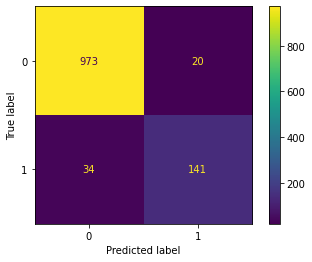

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search.classes_)
disp.plot()

plt.show()

# F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.8392857142857142

# Cohen’s Kappa Score

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_train_pred)

0.8123404483216204